<a href="https://colab.research.google.com/github/valjara9/Trabajo-de-Acompa-amiento/blob/master/An%C3%A1lisis%20de%20datos%20m%C3%A9dicos%20de%20pacientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datos-de-pacientes-con-diabetes-y-enfermedades-hepáticas.csv")
df.shape

(100, 15)

# **Análisis descriptivo**

In [4]:
columnas_a_incluir = ["Edad", "Glucosa en ayunas", "Presion arterial media", "Peso", "ASTAntes", "ASTDespues", "ALTDespues", "IMC"]
print(df[columnas_a_incluir].describe())

             Edad  Glucosa en ayunas  Presion arterial media        Peso  \
count  100.000000         100.000000              100.000000  100.000000   
mean    49.620000          96.848000              102.946300   90.375400   
std     17.083148          14.220174               11.573609   21.037664   
min     18.000000          70.000000               80.060000   50.760000   
25%     37.000000          85.702500               95.077500   70.812500   
50%     48.000000          98.480000              103.005000   92.995000   
75%     65.000000         109.040000              113.875000  109.780000   
max     79.000000         119.700000              119.840000  119.420000   

         ASTAntes  ASTDespues  ALTDespues         IMC  
count  100.000000   100.00000  100.000000  100.000000  
mean   202.650400    60.95510  124.159600   30.372400  
std     45.053325     5.46215   10.675325    9.133164  
min     65.250000    49.25000   99.870000   13.900000  
25%    178.127500    57.73500  116.

#**Descripción de la población según parámetros medidos**

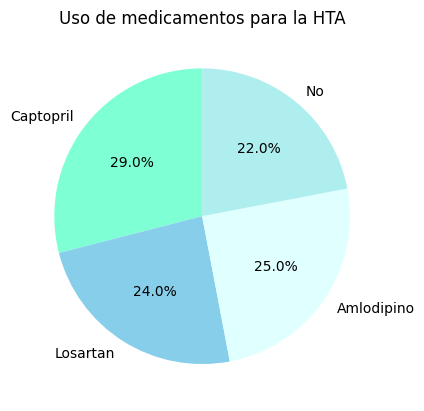

In [5]:
#Descripción de pacientes según uso de medicamentos para la HTA

uso_captopril = df[df["Medicamento para la HTA"] == "Captopril"]

uso_losartan = df[df["Medicamento para la HTA"] == "Losartan"]

uso_amlodipino = df[df["Medicamento para la HTA"] == "Amlodipino"]

no_uso_medicamentos = df[df["Medicamento para la HTA"] == "No"]

categories = ["Captopril", "Losartan", "Amlodipino", "No"]
values = [len(uso_captopril), len(uso_losartan), len(uso_amlodipino), len(no_uso_medicamentos)]
plt.pie(values, labels=categories, autopct="%1.1f%%", startangle=90, colors=["aquamarine", "skyblue", "Lightcyan","paleturquoise"])
plt.title("Uso de medicamentos para la HTA")
plt.show()

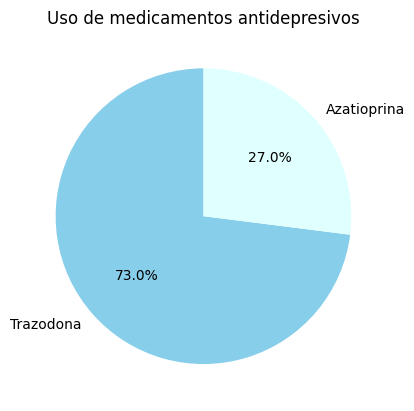

In [26]:
#Descripción de pacientes según uso de medicamentos antidepresivos
uso_trazodona = df[df["Medicamento"] == "Trazodona"]

uso_azatioprina = df[df["Medicamento"] == "Azatioprina"]

categories = ["Trazodona", "Azatioprina"]
values = [len(uso_trazodona), len(uso_azatioprina)]
plt.pie(values, labels=categories, autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightcyan"])
plt.title("Uso de medicamentos antidepresivos")
plt.show()

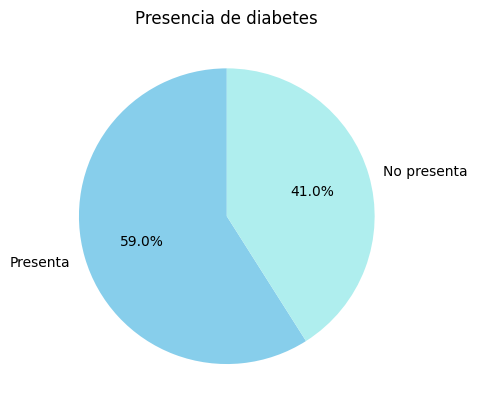

In [7]:
#Descripción de pacientes según presencia de diabetes
presenta_diabetes = df[df["Presenta diabetes"] == "Si"]

no_presenta_diabetes = df[df["Presenta diabetes"] == "No"]

categories = ["Presenta", "No presenta"]
values = [len(presenta_diabetes), len(no_presenta_diabetes)]
plt.pie(values, labels=categories, autopct="%1.1f%%", startangle=90, colors=["skyblue", "paleturquoise"])
plt.title("Presencia de diabetes")
plt.show()

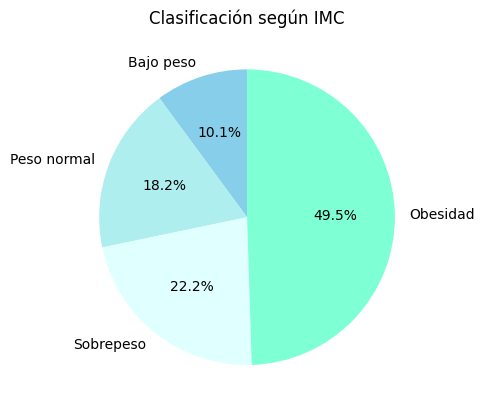

In [37]:
#Descripción de pacientes según su IMC

bajo_peso = df[df["IMC"] < 18.5]
peso_normal = df[(df["IMC"] >= 18.5) & (df["IMC"] <= 24.9)]
sobre_peso = df[(df["IMC"]>= 25) & (df["IMC"] <= 29.9)]
obesidad = df[df["IMC"] >= 30]

#Descripción de pacientes según su IMC

bajo_peso = df[df["IMC"] < 18.5]
peso_normal = df[(df["IMC"] >= 18.5) & (df["IMC"] <= 24.9)]
sobre_peso = df[(df["IMC"]>= 25) & (df["IMC"] <= 29.9)]
obesidad = df[df["IMC"] >= 30]

categories = ["Bajo peso", "Peso normal", "Sobrepeso", "Obesidad"]
values = [len(bajo_peso), len(peso_normal), len(sobre_peso), len(obesidad)]
plt.pie(values, labels=categories, autopct="%1.1f%%", startangle=90, colors=["skyblue", "paleturquoise", "lightcyan","aquamarine"])
plt.title("Clasificación según IMC")
plt.show()

Text(0.5, 1.0, 'Presión arterial media')

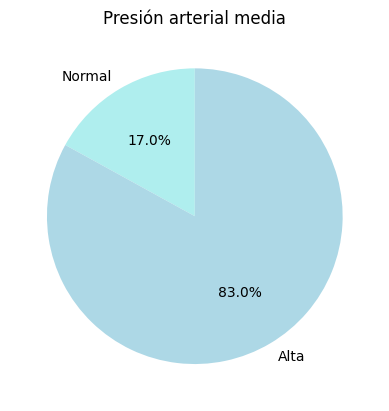

In [29]:
#Descripción de la población según PAM


pam_normal = df[(df["Presion arterial media"] > 60) & (df["Presion arterial media"] <= 90)]
pam_alta = df[df["Presion arterial media"] > 90]

categories =["Normal", "Alta"]
values = [len(pam_normal), len(pam_alta)]
plt.pie(values, labels=categories, autopct="%1.1f%%", startangle=90, colors=["paleturquoise", "lightblue"])
plt.title("Presión arterial media")

#**Análisis de correlación**

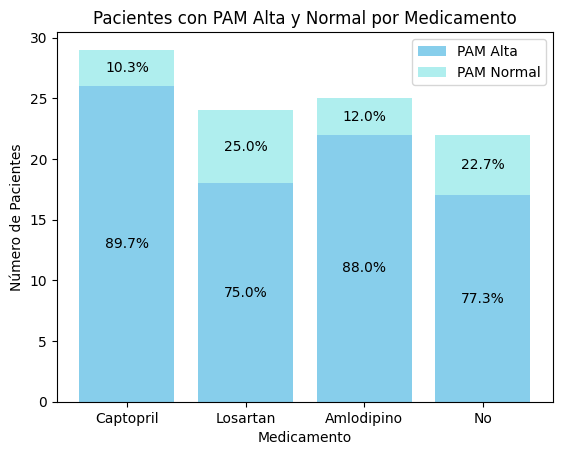

In [13]:
#Relación entre el medicamento usao para tratar el HTA y la medida de PAM
categories = ["Captopril", "Losartan", "Amlodipino", "No"]

values1 = []  # PAM alta
values2 = []  # PAM normal

pam_alta_limite = 90  # PAM > 90 es alta
pam_normal_limite = 90  # PAM entre 60 y 90 es normal

for medicamento in categories:
    if medicamento == "No":
        grupo = df[df["Medicamento para la HTA"] == "No"]
    else:
        grupo = df[df["Medicamento para la HTA"] == medicamento]


    pam_alta = grupo[grupo["Presion arterial media"] > pam_alta_limite]
    values1.append(len(pam_alta))


    pam_normal = grupo[(grupo["Presion arterial media"] >= 60) & (grupo["Presion arterial media"] <= pam_normal_limite)]
    values2.append(len(pam_normal))

totales = [v1 + v2 for v1, v2 in zip(values1, values2)]

fig, ax = plt.subplots()
bar1 = ax.bar(categories, values1, label="PAM Alta", color="skyblue")
bar2 = ax.bar(categories, values2, label="PAM Normal", bottom=values1, color="paleturquoise")

# Función para agregar etiquetas de porcentaje a las barras
def agregar_etiquetas_porcentaje(barras, valores, totales):
    for barra, valor, total in zip(barras, valores, totales):
        height = barra.get_height()
        bottom = barra.get_y()
        porcentaje = (valor / total) * 100  # Calcular el porcentaje
        ax.text(
            barra.get_x() + barra.get_width() / 2,  # Posición X (centro de la barra)
            bottom + height / 2,  # Posición Y (mitad de la altura de la barra)
            f"{porcentaje:.1f}%",  # Texto (porcentaje con un decimal)
            ha="center",
            va="center",
            color="black",
            fontsize=10)

agregar_etiquetas_porcentaje(bar1, values1, totales)  # Porcentajes para PAM alta
agregar_etiquetas_porcentaje(bar2, values2, totales)  # Porcentajes para PAM normal

ax.set_xlabel("Medicamento")
ax.set_ylabel("Número de Pacientes")
ax.set_title("Pacientes con PAM Alta y Normal por Medicamento")
ax.legend()

plt.show()

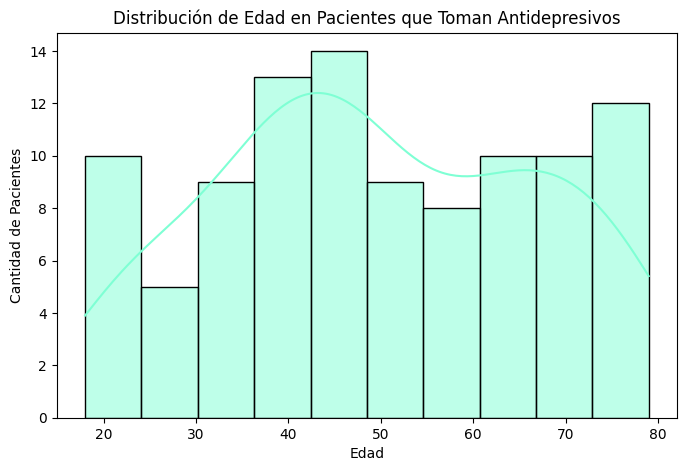

In [ ]:
#Relación entre el uso de antidepresivos y la edad de los pacientes
plt.figure(figsize=(8,5))
sns.histplot(df["Edad"], bins=10, kde=True, color="aquamarine")
plt.title("Distribución de Edad en Pacientes que Toman Antidepresivos")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Pacientes")
plt.show()

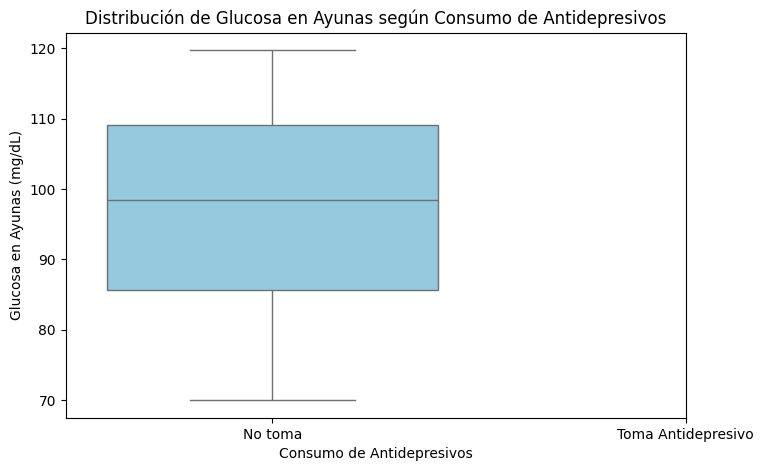

📊 Correlación entre Glucosa en Ayunas y Consumo de Antidepresivos:
                    Glucosa en ayunas  Toma_Antidepresivo
Glucosa en ayunas                 1.0                 NaN
Toma_Antidepresivo                NaN                 NaN

📊 Prueba T:
Estadístico t: nan
P-valor: nan

🟢 No hay una diferencia significativa en los niveles de glucosa entre los grupos.


In [20]:
#Relación entre la glucosa en ayunas y el consumo de antidepresivos

df['Toma_Antidepresivo'] = df['Medicamento'].apply(lambda x: 1 if x in ['Trazodona', 'Azatioprina'] else 0)

if "Glucosa en ayunas" not in df.columns:
    print("⚠️ La columna 'Glucosa en ayunas' no existe en el dataset. Usa el nombre correcto.")
else:

    df_valid = df.dropna(subset=["Glucosa en ayunas", "Toma_Antidepresivo"])

    ## Gráfico de distribución (Boxplot)
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Toma_Antidepresivo", y="Glucosa en ayunas", data=df_valid, color="skyblue")
    plt.xticks([0, 1], ["No toma", "Toma Antidepresivo"])
    plt.title("Distribución de Glucosa en Ayunas según Consumo de Antidepresivos")
    plt.xlabel("Consumo de Antidepresivos")
    plt.ylabel("Glucosa en Ayunas (mg/dL)")
    plt.show()

    ## Calcular correlación
    correlacion = df_valid[["Glucosa en ayunas", "Toma_Antidepresivo"]].corr()
    print("📊 Correlación entre Glucosa en Ayunas y Consumo de Antidepresivos:")
    print(correlacion)

    ## Prueba T para comparar los niveles de glucosa
    glucosa_antidepresivos = df_valid[df_valid["Toma_Antidepresivo"] == 1]["Glucosa en ayunas"]
    glucosa_no_antidepresivos = df_valid[df_valid["Toma_Antidepresivo"] == 0]["Glucosa en ayunas"]

    t_stat, p_value = ttest_ind(glucosa_antidepresivos, glucosa_no_antidepresivos, equal_var=False)

    print(f"\n📊 Prueba T:")
    print(f"Estadístico t: {t_stat:.3f}")
    print(f"P-valor: {p_value:.3f}")

    # Interpretación del p-valor
    if p_value < 0.05:
        print("\n🔴 Hay una diferencia significativa en los niveles de glucosa entre los grupos.")
    else:
        print("\n🟢 No hay una diferencia significativa en los niveles de glucosa entre los grupos.")

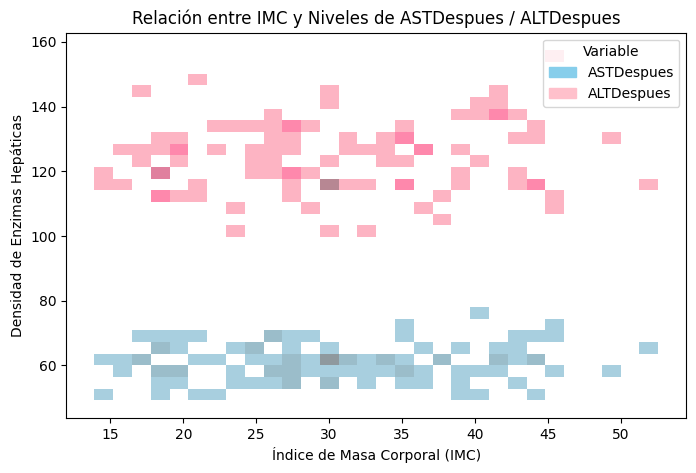

In [32]:
#Relación entre el higado graso (Transaminasas hepáticas elevadas) y el IMC

df_subset = df_valid[['IMC', 'ASTDespues', 'ALTDespues']]

df_melted = pd.melt(df_subset, id_vars=['IMC'], value_vars=['ASTDespues', 'ALTDespues'],
                    var_name='Variable', value_name='Valor')

plt.figure(figsize=(8, 5))
sns.histplot(data=df_melted, x='IMC', y='Valor', hue='Variable',
             kde=True, alpha=0.6, bins=30, palette={"ASTDespues": "skyblue", "ALTDespues": "pink"})

plt.xlabel("Índice de Masa Corporal (IMC)")
plt.ylabel("Densidad de Enzimas Hepáticas")
plt.title("Relación entre IMC y Niveles de ASTDespues / ALTDespues")
plt.show()



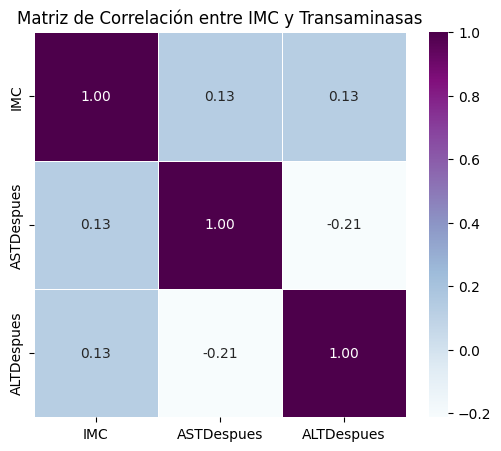

In [35]:
corr_matrix = df_valid[["IMC", "ASTDespues", "ALTDespues"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="BuPu", fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación entre IMC y Transaminasas")
plt.show()

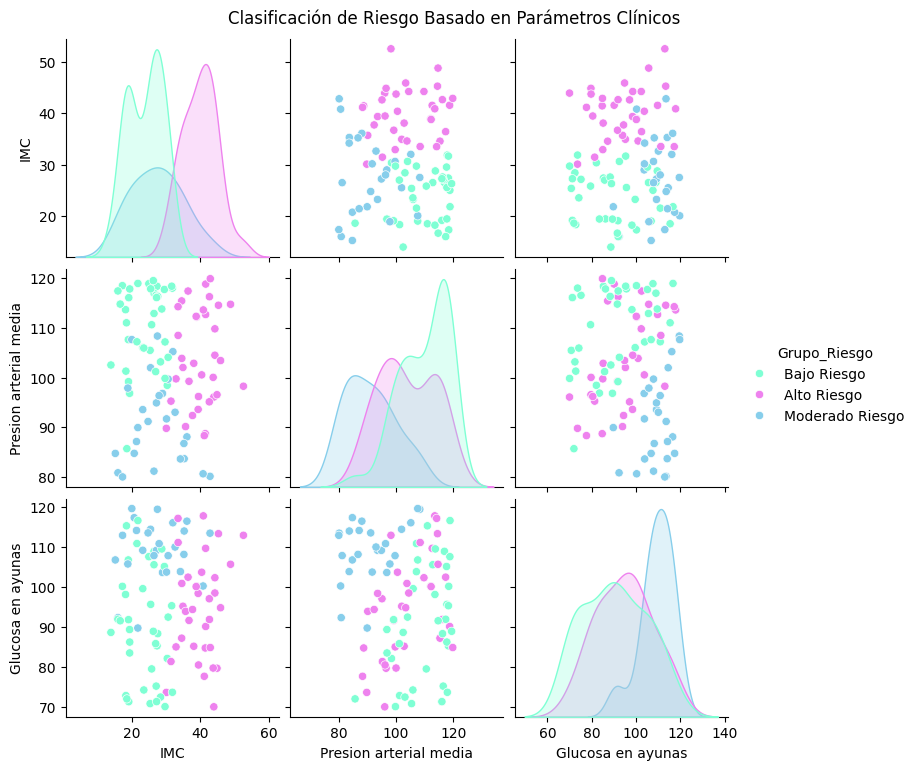

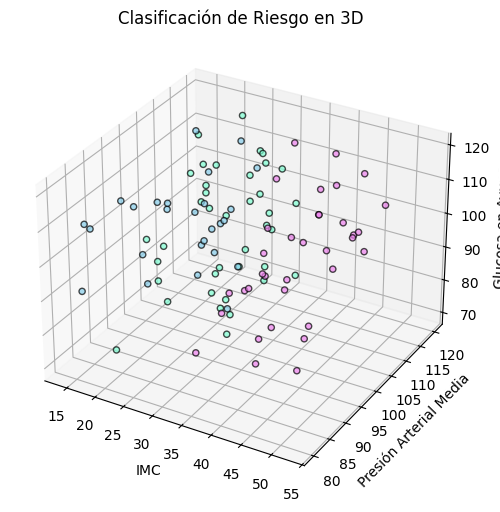

In [25]:
#Clasificación de Riesgo Basado en Parámetros Clínicos

df_valid = df_valid.dropna(subset=["IMC", "Presion arterial media", "Glucosa en ayunas"])

X = df_valid[["IMC", "Presion arterial media", "Glucosa en ayunas"]]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means con 3 grupos (bajo, moderado y alto riesgo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_valid["Grupo_Riesgo"] = kmeans.fit_predict(X_scaled)

grupo_labels = {
    df_valid.groupby("Grupo_Riesgo")[["IMC", "Presion arterial media", "Glucosa en ayunas"]].mean().sum(axis=1).idxmin(): "Bajo Riesgo",
    df_valid.groupby("Grupo_Riesgo")[["IMC", "Presion arterial media", "Glucosa en ayunas"]].mean().sum(axis=1).idxmax(): "Alto Riesgo"
}
grupo_labels = {i: grupo_labels.get(i, "Moderado Riesgo") for i in range(3)}

df_valid["Grupo_Riesgo"] = df_valid["Grupo_Riesgo"].map(grupo_labels)

palette = {"Bajo Riesgo": "aquamarine", "Moderado Riesgo": "skyblue", "Alto Riesgo": "violet"}

# Gráfico de dispersión con hue por grupo de riesgo
sns.pairplot(df_valid, vars=["IMC", "Presion arterial media", "Glucosa en ayunas"], hue="Grupo_Riesgo", palette=palette)
plt.suptitle("Clasificación de Riesgo Basado en Parámetros Clínicos", y=1.02)
plt.show()

# Gráfico 3D para visualizar la clasificación
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores según el grupo de riesgo
colors = df_valid["Grupo_Riesgo"].map(palette)

# Crear el gráfico 3D
ax.scatter(df_valid["IMC"], df_valid["Presion arterial media"], df_valid["Glucosa en ayunas"],
           c=colors, alpha=0.7, edgecolors="k")

# Etiquetas y título
ax.set_xlabel("IMC")
ax.set_ylabel("Presión Arterial Media")
ax.set_zlabel("Glucosa en Ayunas")
ax.set_title("Clasificación de Riesgo en 3D")

plt.show()


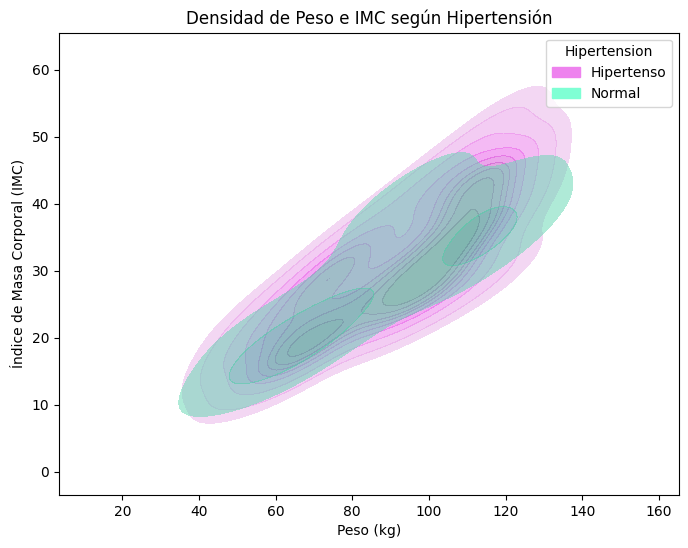

In [24]:
#Peso e IMC como factores de riesgo de Hipertensión
df_valid["Hipertension"] = df_valid["Presion arterial media"].apply(lambda x: "Hipertenso" if x >= 90 else "Normal")

plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df_valid, x="Peso", y="IMC",
    hue="Hipertension",  # Diferenciar hipertensos y normales
    fill=True,  # Rellenar las áreas de densidad
    palette={"Normal": "aquamarine", "Hipertenso": "violet"},
    alpha=0.5
)


plt.xlabel("Peso (kg)")
plt.ylabel("Índice de Masa Corporal (IMC)")
plt.title("Densidad de Peso e IMC según Hipertensión")

plt.show()
